## Load dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**datetime** - hourly date + timestamp  

**season** 
- 1 = spring, 
- 2 = summer, 
- 3 = fall, 
- 4 = winter 

**holiday** - whether the day is considered a holiday

**workingday** - whether the day is neither a weekend nor holiday

**weather **
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**temp** - temperature in Celsius

**atemp** - "feels like" temperature in Celsius

**humidity** - relative humidity

**windspeed** - wind speed

**casual** - number of non-registered user rentals initiated

**registered** - number of registered user rentals initiated

**target** - number of total rentals

In [2]:
bikes = pd.read_csv('/Users/tomas/OneDrive/Documents/Studies/PW-MINI/WUM2020/lab01/train.csv', sep = ',').drop(['registered','casual'], axis=1)
bikes.rename(columns={'count': 'target'}, inplace=True)
bikes['datetime'] = pd.to_datetime(bikes['datetime'])

In [3]:
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [4]:
bikes.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
target                 int64
dtype: object

### Zbadanie podstawowych informacji o kolumnach

In [5]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,target
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [6]:
data_na_perc = bikes.count(axis = 0) / (bikes.count(axis = 0) + bikes.isnull().sum(axis = 0))
all_data = pd.DataFrame(data_na_perc).reset_index()
all_data.columns = ['variable','non_missing_proc']
all_data

,variable,non_missing_proc
0,datetime,1.0
1,season,1.0
2,holiday,1.0
3,workingday,1.0
4,weather,1.0
5,temp,1.0
6,atemp,1.0
7,humidity,1.0
8,windspeed,1.0
9,target,1.0


### Zbadanie zmiennej celu

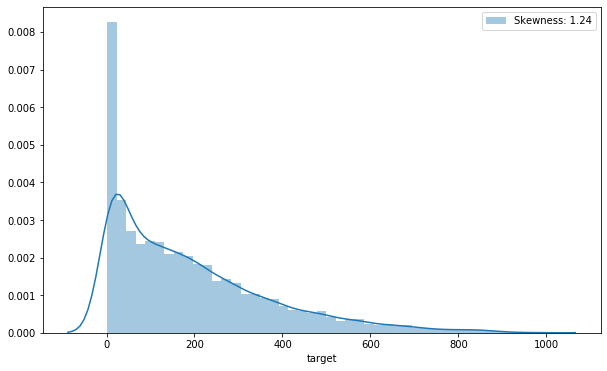

In [7]:
plt.figure(figsize=(10,6))
sns.distplot(bikes.target, label='Skewness: %.2f' % (bikes.target.skew()))
plt.legend()
plt.show()

### Zbadanie rozkładu zmiennych numerycznych

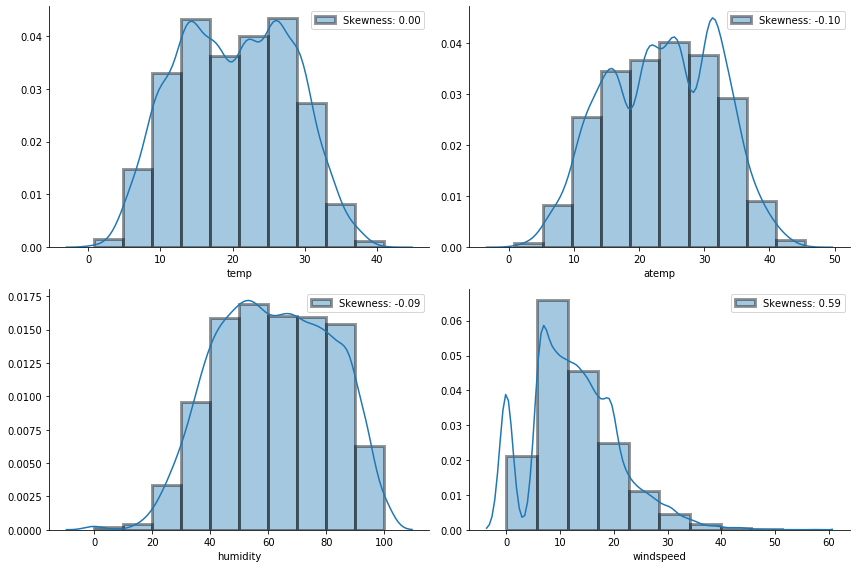

In [8]:
continuous_feat = ['temp', 'atemp', 'humidity', 'windspeed']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    current_series = bikes[continuous_feat[idx]]
    ax = sns.distplot(current_series, bins=10, hist_kws={'edgecolor': 'black', 'linewidth': 3},
                      label=f'Skewness: {current_series.skew():.2f}')
    ax.legend()
sns.despine()
plt.tight_layout()
plt.show()

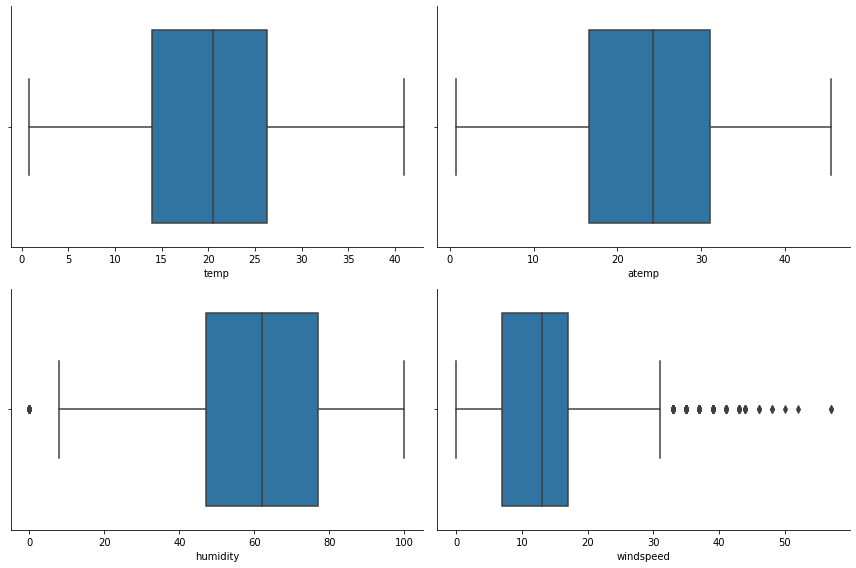

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    current_series = bikes[continuous_feat[idx]]
    ax = sns.boxplot(current_series)
sns.despine()
plt.tight_layout()
plt.show()

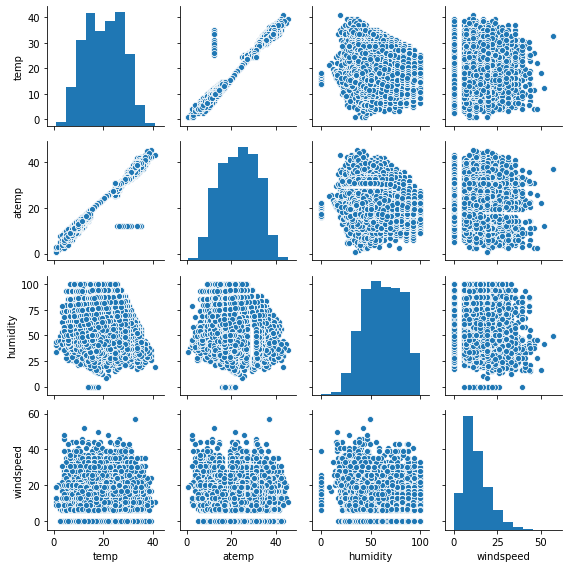

In [14]:
sns.pairplot(bikes.loc[:,continuous_feat], size=2)
plt.tight_layout()

### Zbadanie rozkładu zmiennych kategorycznych
#### countplot

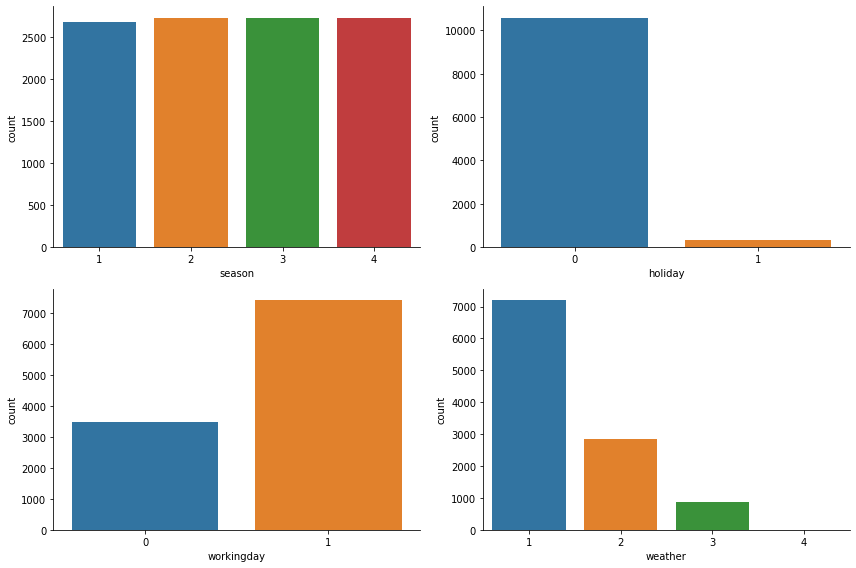

In [10]:
categorical_feat = ['season', 'holiday', 'workingday', 'weather']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.countplot(x = categorical_feat[idx], data=bikes)
sns.despine()
plt.tight_layout()
plt.show()

#### barplot

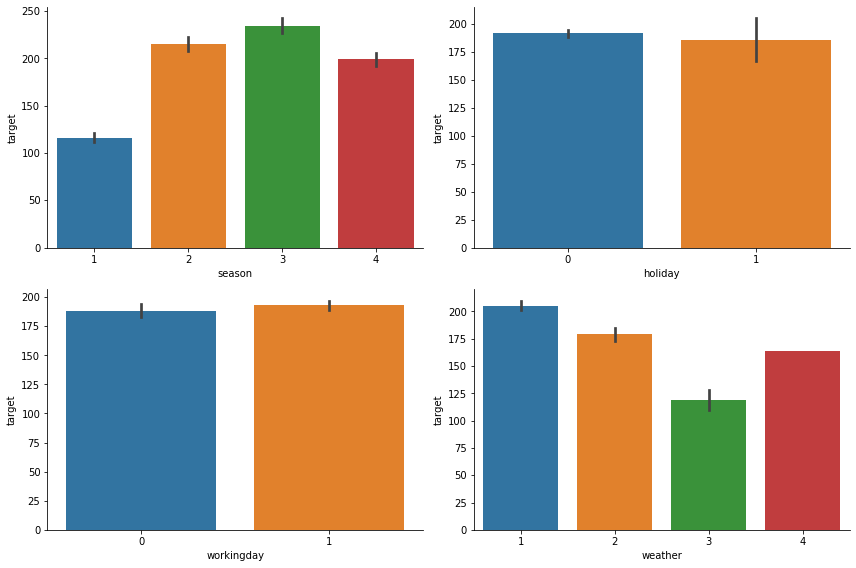

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.barplot(x = categorical_feat[idx], y = 'target', data=bikes)
sns.despine()
plt.tight_layout()
plt.show()

### Rozkład zmiennej celu dla poszczególnych kategorii

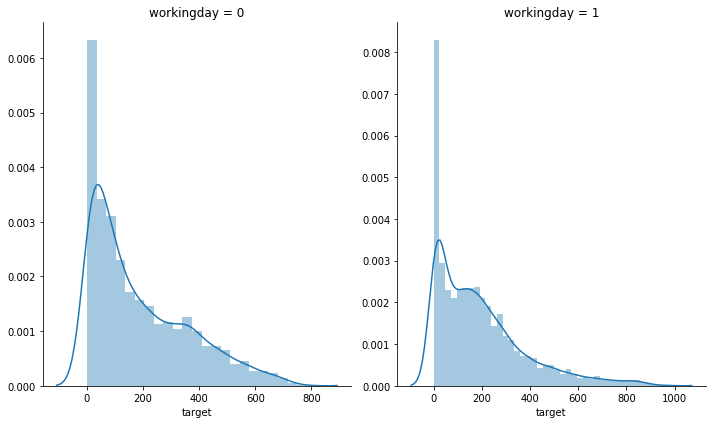

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
axes = axes.flatten()
for idx, ax in enumerate(axes):
    plt.sca(ax)
    ax = sns.distplot(bikes[bikes['workingday'] == idx]['target'])
    ax.title.set_text('workingday = ' + str(idx))
sns.despine()
plt.tight_layout()
plt.show()

### Zbadanie korelacji

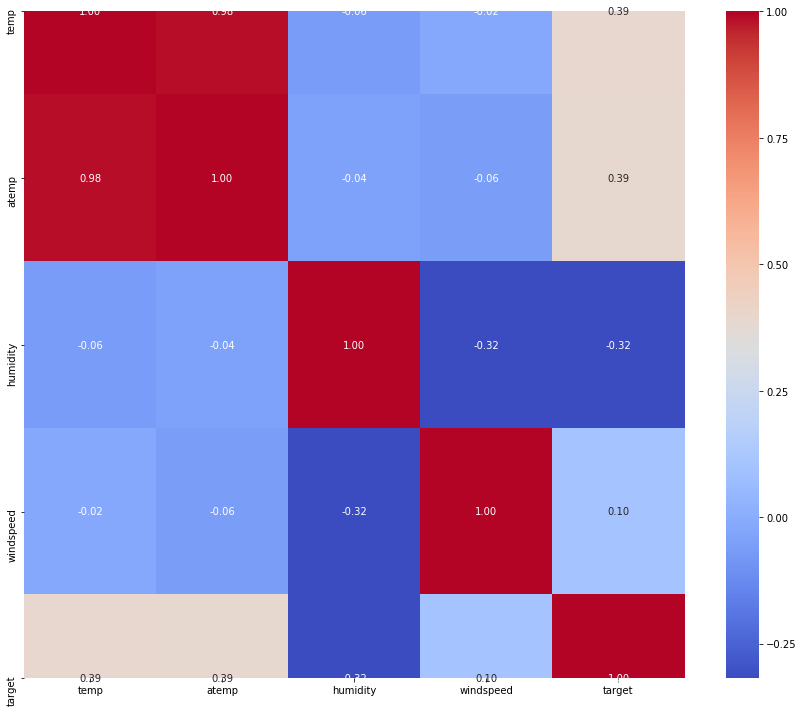

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(bikes.loc[:,continuous_feat + ['target']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.tight_layout()
plt.show()

### Dodanie kolejnych zmiennych i ponowne zbadanie korelacji

In [19]:
bikes['hour'] = bikes.datetime.dt.hour
bikes['weekday'] = bikes.datetime.dt.weekday
bikes['day'] = bikes.datetime.dt.day
bikes['month'] = bikes.datetime.dt.month
bikes['year'] = bikes.datetime.dt.year

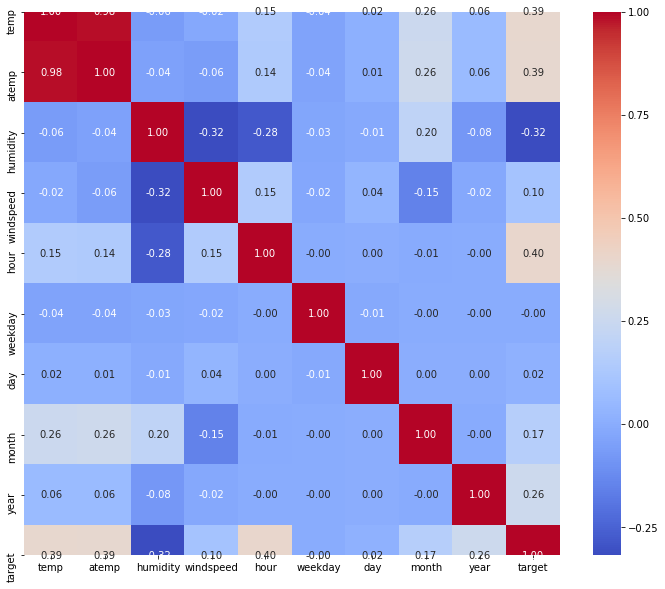

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(bikes.loc[:,continuous_feat+['hour','weekday','day','month','year','target']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

### Zadanie
Zadanie nie jest na ocenę, ma na celu tylko sprawdzenie jaki jest dominujący język/biblioteki w grupie i zobaczyć jak sobie radzicie z danymi

#### Pobierz zbiór danych:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing -> bank.csv

Przeprowadź EDA dowolnej kolumny numerycznej w wybranym przez siebie języku i bibliotekach:
- Rozkład zmiennej
- Zależności między wybraną zmienną a innymi
- Krótki opis tego co wyszło

Rozwiązanie (Jupyter Notebook/Rmd + HTML) należy wrzucić jako pull request na repo https://github.com/mini-pw/2020L-WUM do folderu /Prace_domowe/Zadanie0/Grupa2/NazwiskoImię

Nawet jeżeli ktoś zrobi bardzo mało - proszę wrzucić cokolwiek - w taki sposób będzie sprawdzona obecność na zajęciach.